In [ ]:
import  drug2cell   as  d2c
import  scanpy  as  sc
import  matplotlib  as  mpl
import  blitzgsea   as  bltz    
import  anndata as  ad
import pandas as pd
import leidenalg
import hdf5plugin
import csv

### Whole ZFTA organoid Drug2cell analysis

In [3]:
whole_zfta = sc.read_h5ad("/hpc/pmc_kool/fvalzano/Jupyter/Drug2cell/Ependymoma_whole_organoid/whole_zfta.h5ad")
whole_zfta.layers["RNA"] = whole_zfta.X.copy()
whole_zfta

AnnData object with n_obs × n_vars = 6915 × 20233
    obs: 'new_mapping', 'own_mapping'
    var: 'features'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'RNA'

In [4]:
d2c.score(whole_zfta, use_raw=False, layer="RNA")
whole_zfta.uns['drug2cell'].var


,genes,all_genes
CHEMBL3989924|LUTETIUM DOTATATE LU-177,"SSTR1,SSTR5,SSTR2,SSTR3","SSTR3,SSTR2,SSTR1,SSTR5,SSTR4"
CHEMBL2108709|COLLAGENASE CLOSTRIDIUM HISTOLYTICUM,"COL24A1,COL11A1,COL3A1,COL5A2,COL4A4,COL6A3,CO...","COL1A1,COL5A3,COL4A3,COL6A5,COL6A1,COL15A1,COL..."
CHEMBL256997|ATALUREN,"RPL22,RPL11,RPS8,RPL5,RPS27,RPS7,RPS27A,RPL31,...","RPS24,RPS11,RPS17,RPS14,RPL9P8,RPL18A,RPS27A,R..."
CHEMBL4297240|ONASEMNOGENE ABEPARVOVEC,"SMN2,SMN1","SMN1,SMN2"
CHEMBL1201556|BECAPLERMIN,"PDGFRA,PDGFRB","PDGFRB,PDGFRA"
...,...,...
CHEMBL2068724|ACAMPROSATE CALCIUM,"GABRD,GABRG1,GABRA2,GABRA4,GABRB1,GABRB2,GABRA...","GABRB2,GABRA1,GABRB1,GRIN2C,GRIN2D,GRIN2A,GABR..."
CHEMBL1562610|MECLOFENAMATE SODIUM,"PTGS2,GMNN,PTGS1","ALOX5,GMNN,PTGS1,CYP2C9,PTGS2"
CHEMBL1200467|HYDROXYZINE PAMOATE,"KDM4A,HRH1,POLK,EHMT2,POLH,HSD17B10,FEN1,PLK1,...","POLI,EHMT2,FEN1,HRH1,HSD17B10,KDM4A,PLK1,POLH,..."
CHEMBL454|BUTALBITAL,"GABRD,GABRG1,GABRA2,GABRA4,GABRB1,GABRB2,GABRA...","GABRE,GABRG3,GABRB2,GABRG2,GABRB1,GABRA3,GABRA..."


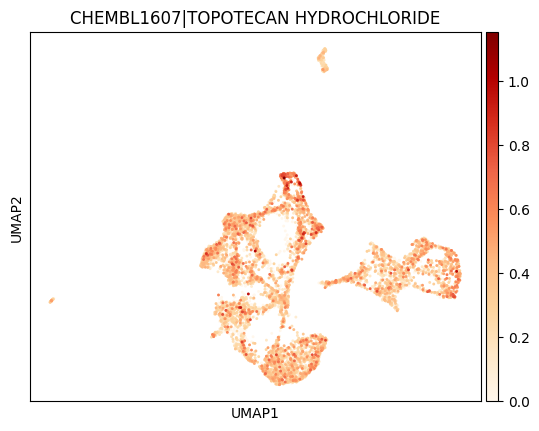

/hpc/local/Rocky8/pmc_kool/miniconda3/envs/drug2cell/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/hpc/local/Rocky8/pmc_kool/miniconda3/envs/drug2cell/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


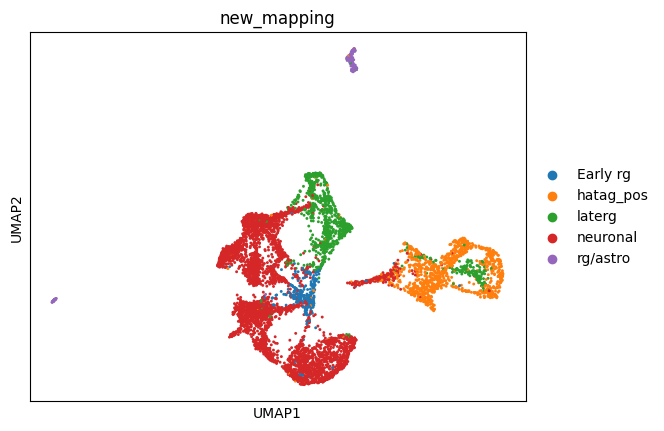

In [11]:
sc.pl.umap(whole_zfta.uns['drug2cell'], color="CHEMBL1607|TOPOTECAN HYDROCHLORIDE", color_map="OrRd")
sc.pl.umap(whole_zfta, color='new_mapping')

/hpc/local/Rocky8/pmc_kool/miniconda3/envs/drug2cell/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


/hpc/local/Rocky8/pmc_kool/miniconda3/envs/drug2cell/lib/python3.12/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/hpc/local/Rocky8/pmc_kool/miniconda3/envs/drug2cell/lib/python3.12/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/hpc/local/Rocky8/pmc_kool/miniconda3/envs/drug2cell/lib/python3.12/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future vers

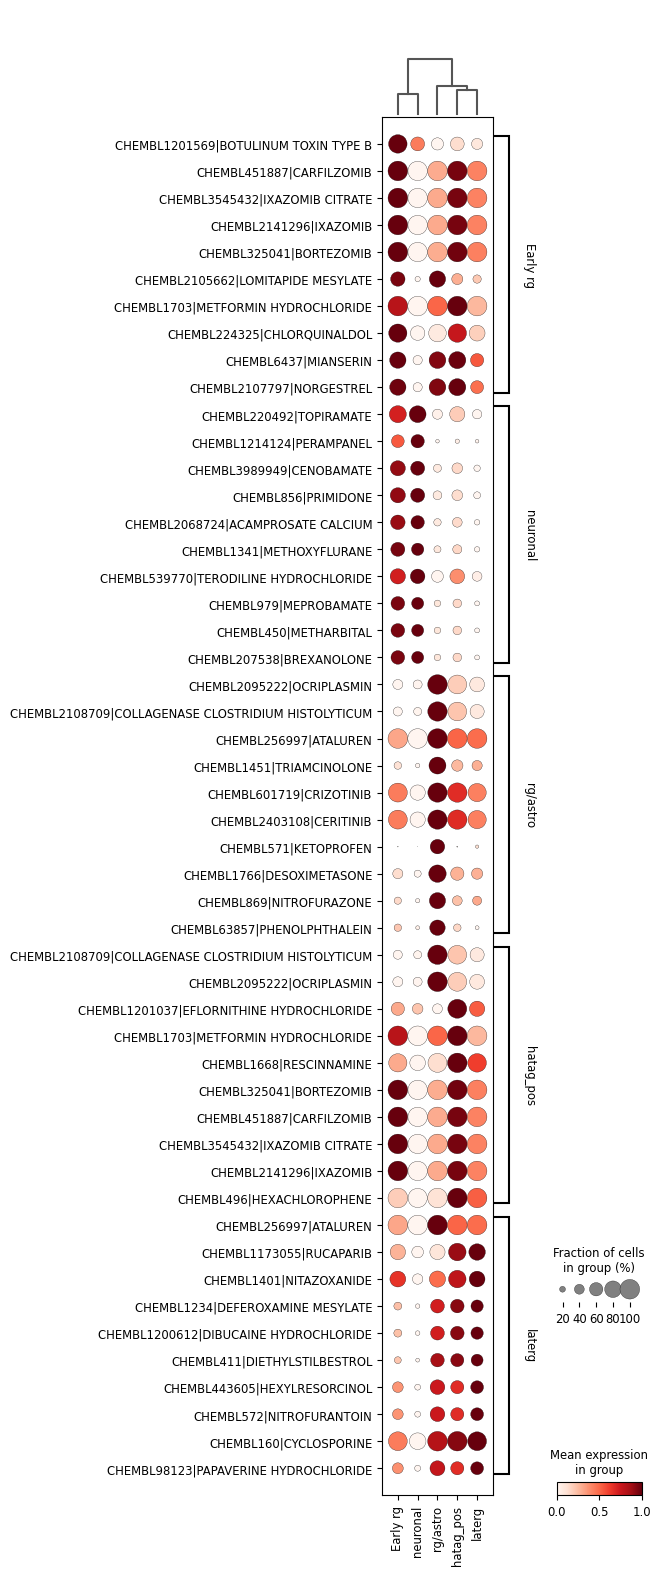

In [5]:
sc.tl.rank_genes_groups(whole_zfta.uns['drug2cell'], method="wilcoxon", groupby="new_mapping") #Annotation MUST be a character, not numerical
sc.pl.rank_genes_groups_dotplot(whole_zfta.uns['drug2cell'], swap_axes=True, dendrogram=True, groupby ="new_mapping", n_genes=10, standard_scale='var')

In [6]:
drug_names = pd.DataFrame(whole_zfta.uns['drug2cell'].uns['rank_genes_groups']['names'])
drug_scores = pd.DataFrame(whole_zfta.uns['drug2cell'].uns['rank_genes_groups']['scores'])
pvals = pd.DataFrame(whole_zfta.uns['drug2cell'].uns['rank_genes_groups']['pvals'])

/hpc/local/Rocky8/pmc_kool/miniconda3/envs/drug2cell/lib/python3.12/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/hpc/local/Rocky8/pmc_kool/miniconda3/envs/drug2cell/lib/python3.12/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/hpc/local/Rocky8/pmc_kool/miniconda3/envs/drug2cell/lib/python3.12/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Pa

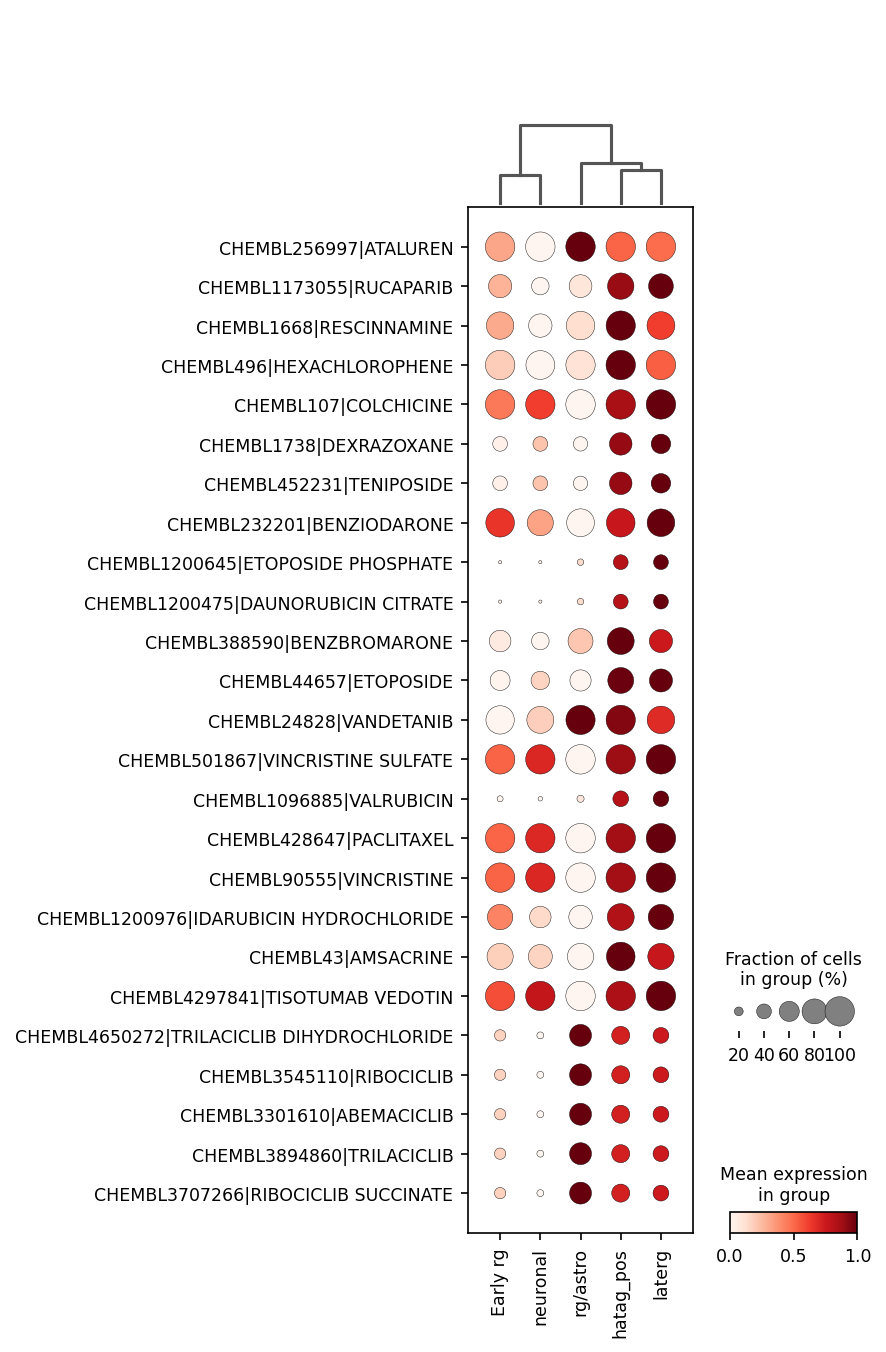

<Figure size 640x480 with 0 Axes>

In [19]:
hatagpos_drug_prediction = pd.concat([drug_names.iloc[:,1], drug_scores.iloc[:,1], pvals.iloc[:,1]],axis = 1)
hatagpos_drug_prediction.iloc[:,0]
with mpl.rc_context({"figure.figsize": (8, 8), "figure.dpi": (150)}):
    sc.pl.dotplot(whole_zfta.uns['drug2cell'], var_names=hatagpos_drug_prediction.iloc[:,0].head(25), swap_axes=True, dendrogram=True, groupby ="new_mapping", standard_scale='var', save="D2C_whole_ZFTA_top25_HAtagpos.png")
mpl.pyplot.savefig("D2C_whole_ZFTA_top25_HAtagpos.svg")

In [106]:
earlyrg_drug_prediction = pd.concat([drug_names.iloc[:,0], drug_scores.iloc[:,0], pvals.iloc[:,0]],axis = 1)
earlyrg_drug_prediction.to_csv("/hpc/pmc_kool/fvalzano/Jupyter/Drug2cell/Ependymoma_whole_organoid/whole_zfta_earlyrg_drug_prediction.csv", index=True)
hatagpos_drug_prediction = pd.concat([drug_names.iloc[:,1], drug_scores.iloc[:,1], pvals.iloc[:,1]],axis = 1)
hatagpos_drug_prediction.to_csv("/hpc/pmc_kool/fvalzano/Jupyter/Drug2cell/Ependymoma_whole_organoid/whole_zfta_hatagpos_drug_prediction.csv", index=True)
laterg_drug_prediction = pd.concat([drug_names.iloc[:,2], drug_scores.iloc[:,2], pvals.iloc[:,2]],axis = 1)
laterg_drug_prediction.to_csv("/hpc/pmc_kool/fvalzano/Jupyter/Drug2cell/Ependymoma_whole_organoid/whole_zfta_laterg_drug_prediction.csv", index=True)
neuronal_drug_prediction = pd.concat([drug_names.iloc[:,3], drug_scores.iloc[:,3], pvals.iloc[:,3]],axis = 1)
neuronal_drug_prediction.to_csv("/hpc/pmc_kool/fvalzano/Jupyter/Drug2cell/Ependymoma_whole_organoid/whole_zfta_neuronal_drug_prediction.csv", index=True)
rgastro_drug_prediction = pd.concat([drug_names.iloc[:,4], drug_scores.iloc[:,4], pvals.iloc[:,4]],axis = 1)
rgastro_drug_prediction.to_csv("/hpc/pmc_kool/fvalzano/Jupyter/Drug2cell/Ependymoma_whole_organoid/whole_zfta_rgastro_drug_prediction.csv", index=True)

### Whole YAP organoids Drug2cell analysis

In [11]:
whole_yap = sc.read_h5ad("/hpc/pmc_kool/fvalzano/Jupyter/Drug2cell/Ependymoma_whole_organoid/whole_yap.h5ad")
whole_yap.layers["RNA"] = whole_yap.X.copy()
whole_yap

AnnData object with n_obs × n_vars = 6877 × 19631
    obs: 'new_mapping'
    var: 'features'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'RNA'

In [12]:
d2c.score(whole_yap, use_raw=False, layer="RNA")
whole_yap.uns['drug2cell'].var

,genes,all_genes
CHEMBL3989924|LUTETIUM DOTATATE LU-177,"SSTR1,SSTR2","SSTR3,SSTR2,SSTR1,SSTR5,SSTR4"
CHEMBL2108709|COLLAGENASE CLOSTRIDIUM HISTOLYTICUM,"COL11A1,COL3A1,COL5A2,COL4A4,COL4A3,COL6A3,COL...","COL1A1,COL5A3,COL4A3,COL6A5,COL6A1,COL15A1,COL..."
CHEMBL256997|ATALUREN,"RPL22,RPL11,RPS8,RPL5,RPS27,RPS7,RPS27A,RPL31,...","RPS24,RPS11,RPS17,RPS14,RPL9P8,RPL18A,RPS27A,R..."
CHEMBL4297240|ONASEMNOGENE ABEPARVOVEC,"SMN2,SMN1","SMN1,SMN2"
CHEMBL1201556|BECAPLERMIN,"PDGFRA,PDGFRB","PDGFRB,PDGFRA"
...,...,...
CHEMBL2068724|ACAMPROSATE CALCIUM,"GABRD,GABRG1,GABRA2,GABRA4,GABRB1,GABRB2,GABRA...","GABRB2,GABRA1,GABRB1,GRIN2C,GRIN2D,GRIN2A,GABR..."
CHEMBL1562610|MECLOFENAMATE SODIUM,"PTGS2,GMNN","ALOX5,GMNN,PTGS1,CYP2C9,PTGS2"
CHEMBL1200467|HYDROXYZINE PAMOATE,"KDM4A,HRH1,POLK,EHMT2,POLH,HSD17B10,FEN1,PLK1,...","POLI,EHMT2,FEN1,HRH1,HSD17B10,KDM4A,PLK1,POLH,..."
CHEMBL454|BUTALBITAL,"GABRD,GABRG1,GABRA2,GABRA4,GABRB1,GABRB2,GABRA...","GABRE,GABRG3,GABRB2,GABRG2,GABRB1,GABRA3,GABRA..."


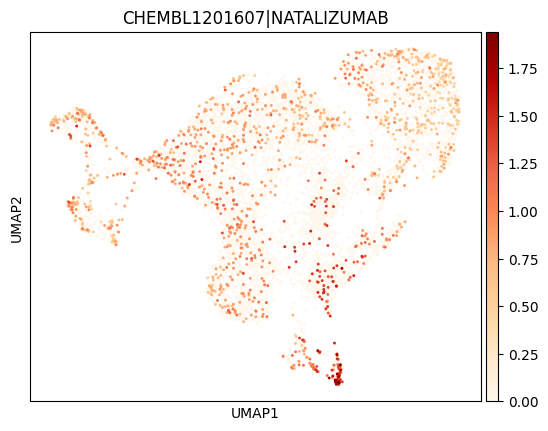

/hpc/local/Rocky8/pmc_kool/miniconda3/envs/drug2cell/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/hpc/local/Rocky8/pmc_kool/miniconda3/envs/drug2cell/lib/python3.12/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


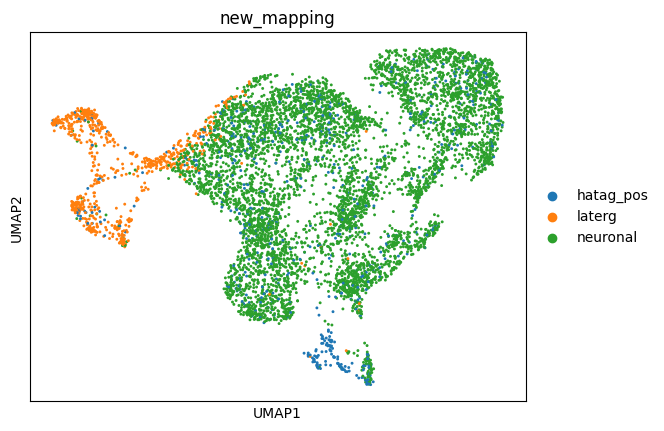

In [125]:
sc.pl.umap(whole_yap.uns['drug2cell'], color="CHEMBL1201607|NATALIZUMAB", color_map="OrRd")
sc.pl.umap(whole_yap, color='new_mapping')

/hpc/local/Rocky8/pmc_kool/miniconda3/envs/drug2cell/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


/hpc/local/Rocky8/pmc_kool/miniconda3/envs/drug2cell/lib/python3.12/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/hpc/local/Rocky8/pmc_kool/miniconda3/envs/drug2cell/lib/python3.12/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/hpc/local/Rocky8/pmc_kool/miniconda3/envs/drug2cell/lib/python3.12/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future vers

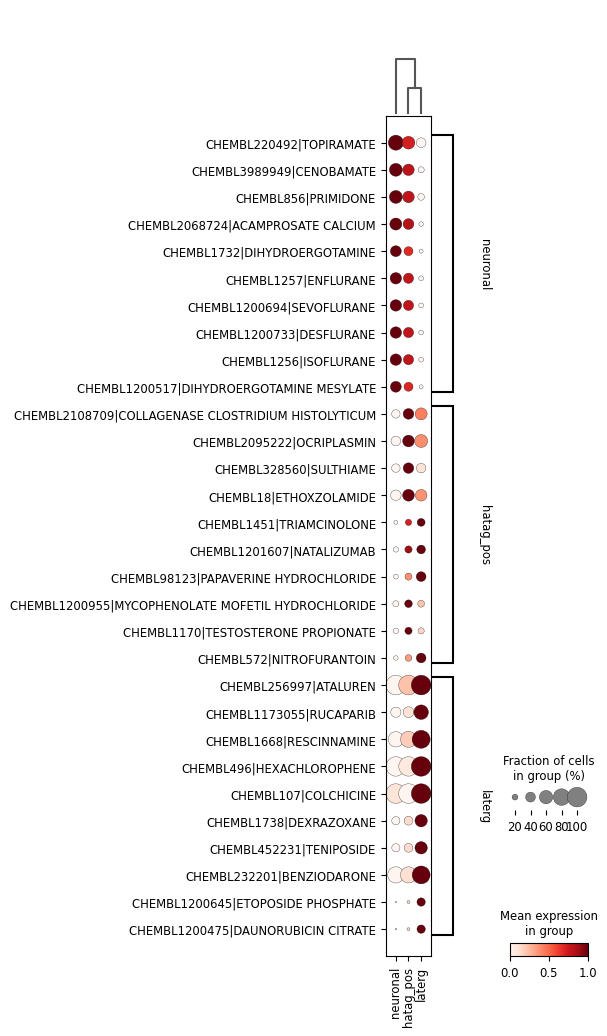

In [13]:
sc.tl.rank_genes_groups(whole_yap.uns['drug2cell'], method="wilcoxon", groupby="new_mapping") #Annotation MUST be a character, not numerical
sc.pl.rank_genes_groups_dotplot(whole_yap.uns['drug2cell'], swap_axes=True, dendrogram=True, groupby ="new_mapping", n_genes=10, standard_scale='var')

In [14]:
drug_names = pd.DataFrame(whole_yap.uns['drug2cell'].uns['rank_genes_groups']['names'])
drug_scores = pd.DataFrame(whole_yap.uns['drug2cell'].uns['rank_genes_groups']['scores'])
pvals = pd.DataFrame(whole_yap.uns['drug2cell'].uns['rank_genes_groups']['pvals'])

/hpc/local/Rocky8/pmc_kool/miniconda3/envs/drug2cell/lib/python3.12/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/hpc/local/Rocky8/pmc_kool/miniconda3/envs/drug2cell/lib/python3.12/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/hpc/local/Rocky8/pmc_kool/miniconda3/envs/drug2cell/lib/python3.12/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Pa

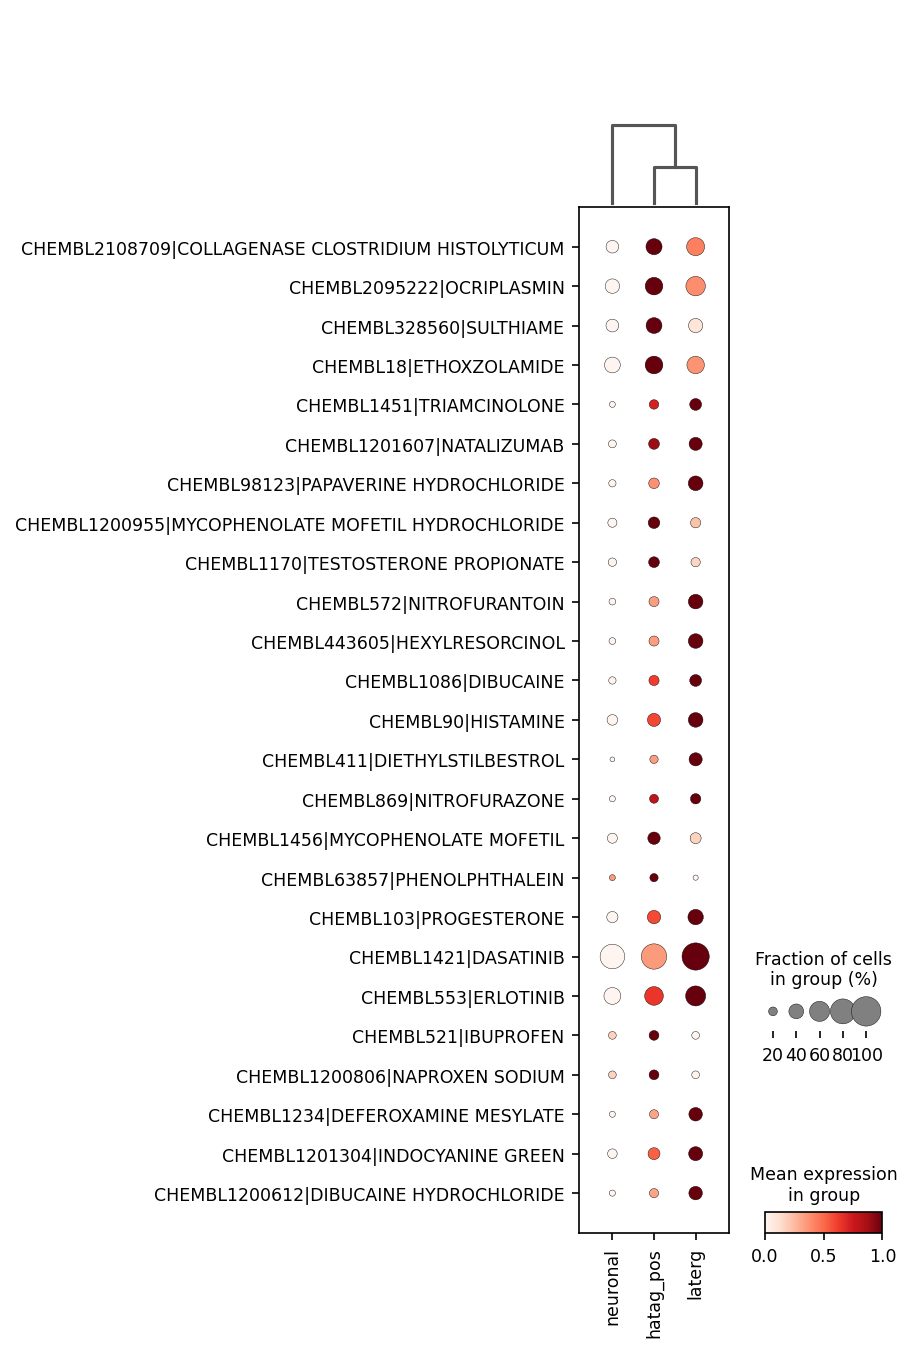

<Figure size 640x480 with 0 Axes>

In [18]:
hatagpos_drug_prediction = pd.concat([drug_names.iloc[:,0], drug_scores.iloc[:,0], pvals.iloc[:,0]],axis = 1)
hatagpos_drug_prediction.iloc[:,0]
with mpl.rc_context({"figure.figsize": (8, 8), "figure.dpi": (150)}):
   sc.pl.dotplot(whole_yap.uns['drug2cell'], var_names=hatagpos_drug_prediction.iloc[:,0].head(25), swap_axes=True, dendrogram=True, groupby ="new_mapping", standard_scale='var', save="D2C_whole_YAP_top25_HAtagpos.png")
mpl.pyplot.savefig("D2C_whole_YAP_top25_HAtagpos.svg")

In [62]:

hatag_drug_prediction = pd.concat([drug_names.iloc[:,0], drug_scores.iloc[:,0], pvals.iloc[:,0]],axis = 1)
hatag_drug_prediction
hatag_drug_prediction.to_csv("/hpc/pmc_kool/fvalzano/Jupyter/Drug2cell/Ependymoma_whole_organoid/whole_yap_hatagpos_drug_prediction.csv", index=True)
laterg_drug_prediction = pd.concat([drug_names.iloc[:,1], drug_scores.iloc[:,1], pvals.iloc[:,1]],axis = 1)
laterg_drug_prediction
laterg_drug_prediction.to_csv("/hpc/pmc_kool/fvalzano/Jupyter/Drug2cell/Ependymoma_whole_organoid/whole_yap_laterg_drug_prediction.csv", index=True)
neuronal_drug_prediction = pd.concat([drug_names.iloc[:,2], drug_scores.iloc[:,2], pvals.iloc[:,2]],axis = 1)
neuronal_drug_prediction
neuronal_drug_prediction.to_csv("/hpc/pmc_kool/fvalzano/Jupyter/Drug2cell/Ependymoma_whole_organoid/whole_yap_neuronal_drug_prediction.csv", index=True)